<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-Process-text-data-on-Twitter-data" data-toc-modified-id="Python-Process-text-data-on-Twitter-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Process text data on Twitter data</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-reivew" data-toc-modified-id="Data-reivew-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data reivew</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Drop-useless-columns" data-toc-modified-id="Drop-useless-columns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Drop useless columns</a></span></li><li><span><a href="#Extract-text-data" data-toc-modified-id="Extract-text-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Extract text data</a></span></li><li><span><a href="#text-pipline" data-toc-modified-id="text-pipline-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>text pipline</a></span></li><li><span><a href="#cleaned-text-sample" data-toc-modified-id="cleaned-text-sample-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>cleaned text sample</a></span></li><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Vectorization</a></span><ul class="toc-item"><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>CountVectorizer</a></span></li><li><span><a href="#Word-count" data-toc-modified-id="Word-count-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Word count</a></span></li></ul></li></ul></li><li><span><a href="#Wordcould" data-toc-modified-id="Wordcould-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Wordcould</a></span></li></ul></div>

# Stage 1

# Introduction

Author: Cholian Li

Date: 2021/09/28

Data sources: data_twitter.csv

# Libraries

In [1]:
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [12]:
ori_data = pd.read_csv('data/data_twitter.csv',nrows = 1000,index_col = 0)
ori_data = pd.read_csv('data/Bitcoin_tweets.csv',nrows=10000)

In [13]:
ori_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [14]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_name         9999 non-null   object 
 1   user_location     5824 non-null   object 
 2   user_description  9354 non-null   object 
 3   user_created      10000 non-null  object 
 4   user_followers    10000 non-null  float64
 5   user_friends      10000 non-null  int64  
 6   user_favourites   10000 non-null  int64  
 7   user_verified     10000 non-null  bool   
 8   date              10000 non-null  object 
 9   text              10000 non-null  object 
 10  hashtags          7951 non-null   object 
 11  source            9889 non-null   object 
 12  is_retweet        10000 non-null  bool   
dtypes: bool(2), float64(1), int64(2), object(8)
memory usage: 879.0+ KB


# Data cleaning

## Drop useless columns

In [15]:
useful_cols = ['text','hashtags']

data = ori_data[useful_cols].copy()

data.head()

,text,hashtags
0,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin']
1,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']"
2,"Guys evening, I have read this article about B...",NaN
3,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']"
4,This network is secured by 9 508 nodes as of t...,['BTC']


In [16]:
data['hashtags'] = data['hashtags'].str.lower()
all_hashtag = data['hashtags'].dropna(axis=0).reset_index(drop=True)

In [18]:
all_hashtag = all_hashtag.apply(func= lambda x: " ".join(map(str,eval(x))))
all_hashtag = " ".join(all_hashtag).split(' ')

from collections import Counter
counter = Counter(all_hashtag)
counter.most_common()

[('bitcoin', 6279),
 ('btc', 5535),
 ('crypto', 1387),
 ('cryptocurrency', 807),
 ('eth', 554),
 ('ethereum', 489),
 ('elonmusk', 391),
 ('tesla', 371),
 ('dogecoin', 369),
 ('btcusd', 304),
 ('binance', 290),
 ('doge', 283),
 ('blockchain', 235),
 ('xrp', 209),
 ('bitcoinmining', 196),
 ('freebitcoin', 182),
 ('btcturk', 178),
 ('cryptotab', 174),
 ('cryptocurrencies', 148),
 ('bnb', 122),
 ('bitcoinnews', 118),
 ('trading', 106),
 ('defi', 99),
 ('altcoins', 97),
 ('bch', 90),
 ('ada', 87),
 ('altcoin', 86),
 ('amazon', 85),
 ('dogearmy', 79),
 ('amazoncoin', 72),
 ('cryptonews', 69),
 ('fx', 65),
 ('ltc', 62),
 ('dogecointothemoon', 61),
 ('tron', 60),
 ('forex', 59),
 ('litecoin', 56),
 ('cardano', 56),
 ('bitcoincash', 54),
 ('pay', 53),
 ('elondoge', 52),
 ('coinbase', 50),
 ('finance', 50),
 ('hodl', 50),
 ('sevenplus', 49),
 ('apple', 48),
 ('money', 47),
 ('altseason', 46),
 ('xlm', 46),
 ('trx', 45),
 ('cryptotrading', 42),
 ('r', 42),
 ('ggplot2', 42),
 ('ripple', 41),
 ('bi

## Extract text data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      1000 non-null   object
 1   hashtags  1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [415]:
# data['created_at'] = pd.to_datetime(data['created_at'],unit='s')
# data = data.sort_values(by='created_at').reset_index(drop=True)
# data.head()

Train test split

In [12]:
from sklearn.model_selection import  train_test_split

TrainDF, TestDF = train_test_split(data,test_size = 0.3,random_state=2)
TrainDF = TrainDF.reset_index(drop=True)
TestDF = TestDF.reset_index(drop=True)

## text pipline

Create a pipeline to help filter the trash words or useless words in the doc

In [28]:
train_text = data['text']

In [32]:
train_text[0]

'Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement https://t.co/xaaZmaJKiV @MyBlueRidgeBank… https://t.co/sgBxMkP1SI'

In [33]:
tag = [re.findall( r"\#[a-zA-Z]*", text) for text in train_text]

In [13]:
import spacy

pipeline = spacy.load('en_core_web_sm')

import re
from spacy.language import Language

# http://emailregex.com/
email_re = r"""(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""

# replace = [ (pattern-to-replace, replacement),  ...]
replace = [
    (r"<a[^>]*>(.*?)</a>", r"\1"),  # Matches most URLs
    (email_re, "email"),            # Matches emails
    (r"[a-zA-Z]*http[a-zA-Z]*","link"),  # substitute the useless related words "http"
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "numbr"),              # Map digits to special token <numbr>

    (r"\#[a-zA-Z]*",""), # Remove the hasg tag
    (r"\@[a-zA-Z]*",""), # Remove the hasg tag
    (r"[\t\n\r\*\.\@\,\-\/]", " "),   # Punctuation and other junk

    (r"[a-zA-Z]*numbr[a-zA-Z]*","numbr"),  # substitute the useless related words "numbr"

    (r"\W"," "),                      # Matches any character that is not a word character (alphanumeric & underscore)

    (r"\b[\w]\b", ""),              # matching single character
    (r"\s+", " ")                   # Stips extra whitespace
]

train_text = TrainDF['text']
test_text = TestDF['text']

for repl in replace:
    train_text = [re.sub(repl[0], repl[1], text) for text in train_text]
    test_text = [re.sub(repl[0], repl[1], text) for text in test_text]


In [14]:
@Language.component("dbpedia_14")
def dbpedia_14_preprocess(doc):
    tokens = [token for token in doc 
              if not any((token.is_stop, token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    tokens = [token for token in tokens if token]
    return " ".join(tokens)

pipeline.add_pipe("dbpedia_14");

In [15]:
train_text = [pipeline(doc) for doc in train_text]
test_text = [pipeline(doc) for doc in test_text]

## cleaned text sample

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
vocab_size = len(set(" ".join(train_text).split(" ")))
vocab_size

1735

In [18]:
bow_featurizer = CountVectorizer(max_features=vocab_size, max_df=0.95, min_df=0.005, stop_words='english')
tfidf_featurizer = TfidfVectorizer(max_features=vocab_size, max_df=0.95, stop_words='english')

# train data
X_bow = bow_featurizer.fit_transform(train_text)
X_tfidf = tfidf_featurizer.fit_transform(train_text)

# test data
X_bow_test = bow_featurizer.transform(test_text)
X_tfidf_test = tfidf_featurizer.transform(test_text)

type(X_bow), X_bow.shape

(scipy.sparse.csr.csr_matrix, (700, 281))

In [19]:
# idx2word = {idx: word for word, idx in bow_featurizer.vocabulary_.items()}
idx2word = {idx: word for word, idx in tfidf_featurizer.vocabulary_.items()}

In [20]:
# Configurable
K = 10

In [21]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def plot_top_words(model, feature_names, n_top_words, title):
    plt.clf()
    cols = 5
    rows = K // 5 + K % 5
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[::-1][:n_top_words]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# SVD

In [23]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=K, random_state=42)
# svd.fit(X_bow)
svd.fit(X_tfidf)

top_10_words = pd.DataFrame() 
n_top_words = 10
feature_names = idx2word
word_weight = np.empty(shape=(0,n_top_words))

for topic_idx, topic in enumerate(svd.components_):
    top_features_ind = topic.argsort()[::-1][:n_top_words]
    # record the weight of keywords for each topic
    word_weight = np.append(word_weight, [topic[top_features_ind]],axis = 0)
    top_features = [feature_names[i] for i in top_features_ind]
    name = f"topic {topic_idx}"
    top_10_words[name] = top_features

In [24]:
top_10_words

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,numbr,link,vault,project,numbr,nfl,hrs,new,great,participate
1,link,vault,play,nfl,usdt,bsc,spot,great,check,airdrop
2,day,location,location,good,gmt,great,gmt,btc,space,rule
3,market,awesome,awesome,great,spot,address,net,check,mcontent,guideline
4,price,play,day,future,hrs,link,flow,eth,finance,follow
5,change,join,market,team,nfl,opportunity,trading,mcontent,usdt,hope
6,volume,user,join,nice,awesome,sir,total,space,website,io
7,cap,roman,user,sir,vault,crypto,eth,crypto,spot,finance
8,crypto,green,rank,participate,play,day,change,analysis,hrs,great
9,usd,lqcijjjfmb,trend,bsc,location,thank,price,technical,excellent,lucky


<Figure size 432x288 with 0 Axes>

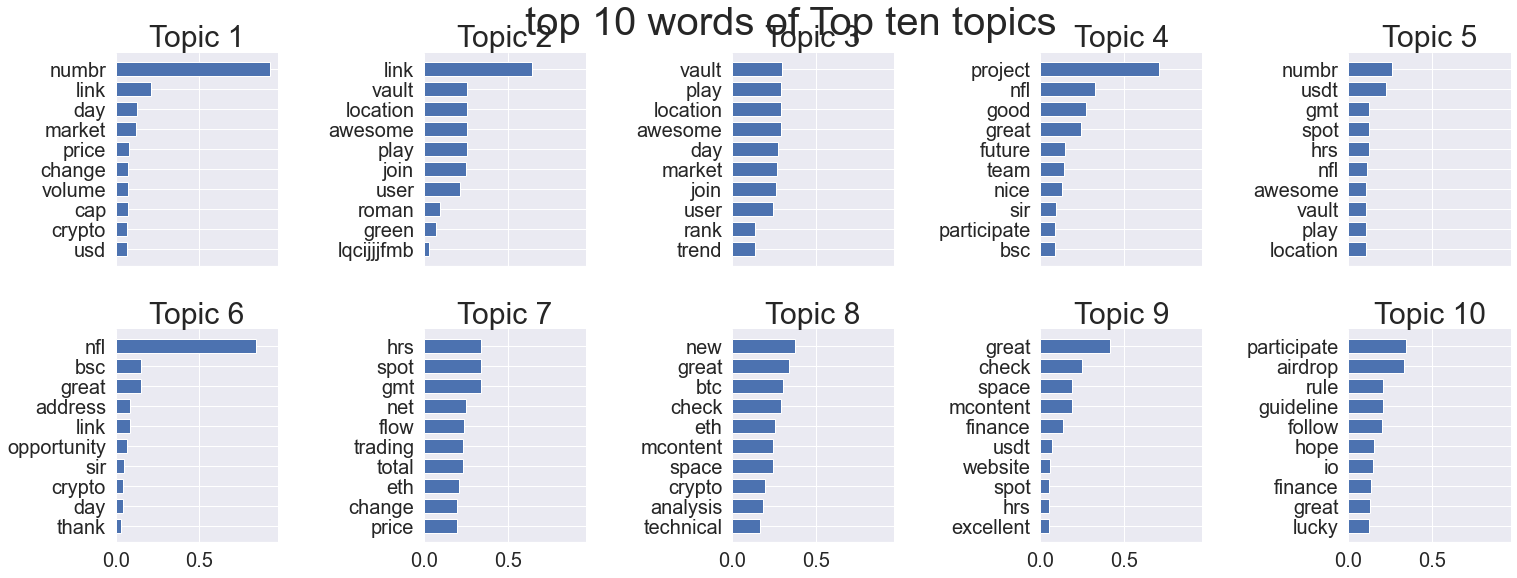

In [25]:
plot_top_words(svd, idx2word, 10, 'top 10 words of Top ten topics')

In [26]:
# by setting the threshold as 0.5, we filtered out several topic
selected_topics = top_10_words.iloc[:,(word_weight>0.5).sum(axis = 1)>=1]
selected_topics

,topic 0,topic 1,topic 3,topic 5
0,numbr,link,project,nfl
1,link,vault,nfl,bsc
2,day,location,good,great
3,market,awesome,great,address
4,price,play,future,link
5,change,join,team,opportunity
6,volume,user,nice,sir
7,cap,roman,sir,crypto
8,crypto,green,participate,day
9,usd,lqcijjjfmb,bsc,thank


# NMF

/Users/cholian/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

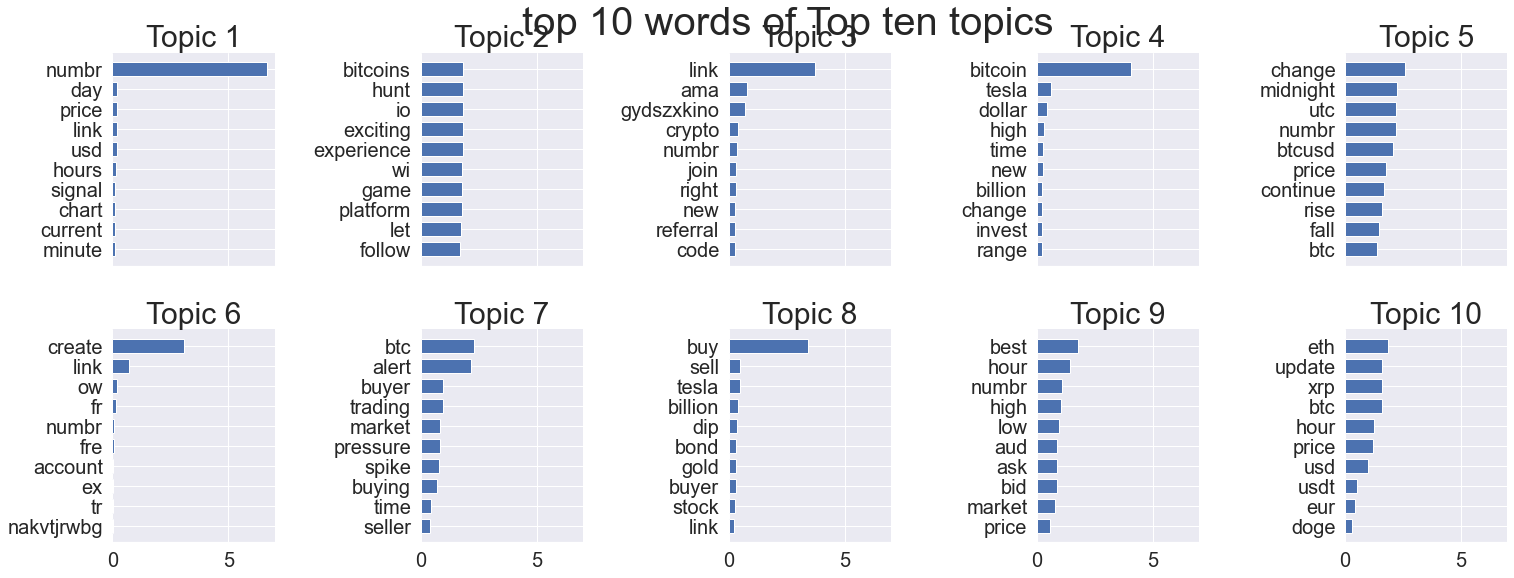

In [432]:
from sklearn.decomposition import NMF

model_NMF = NMF(n_components=K, init='random', random_state=0)
# model_NMF.fit(X_bow)
model_NMF.fit(X_tfidf)

plot_top_words(model_NMF, idx2word, K, 'top 10 words of Top ten topics')

# LDA


why do not use tfidf in LDA?

In the word sampling steps in LDA the word count is used as weights for the multinomial dist. Re-weighting the TF's by its IDF's would dispropotionally increase the chance of rare words being sampled, making them have a stronger influence in topic assignment. But rare words have equally low probabilities of showing up in all documents and topics, hence flattening out the topic distribution of each document.

That is a similar reason why it is recommended to remove stop-words before running LDA.

<Figure size 432x288 with 0 Axes>

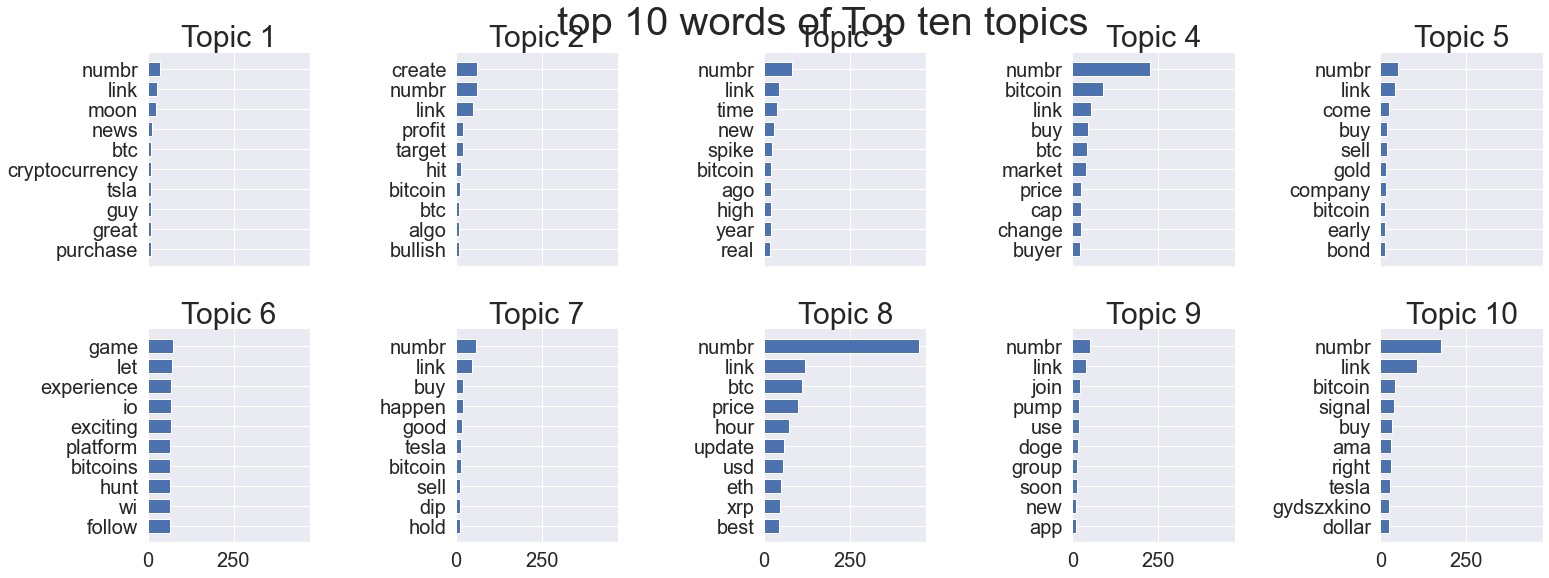

In [433]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=K, random_state=0)
# LDA.fit(X_bow)
LDA.fit(X_tfidf)

plot_top_words(LDA, idx2word, K, 'top 10 words of Top ten topics')

In [437]:
# LSA_pred = svd.transform(X_bow_test).argmax(axis=1)
# NMF_pred = model_NMF.transform(X_bow_test).argmax(axis=1)
# LDA_pred = LDA.transform(X_bow_test).argmax(axis=1)

LSA_pred = svd.transform(X_tfidf_test).argmax(axis=1)
NMF_pred = model_NMF.transform(X_tfidf_test).argmax(axis=1)
LDA_pred = LDA.transform(X_tfidf_test).argmax(axis=1)

In [438]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

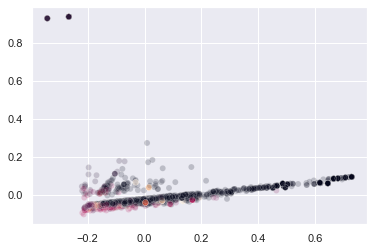

In [439]:
# sim_mat_pca = pca.fit_transform(X_bow_test.toarray())
sim_mat_pca = pca.fit_transform(X_tfidf_test.toarray())
sns.scatterplot(x = sim_mat_pca[:,0],y = sim_mat_pca[:,1],c = LSA_pred,alpha=0.2)
plt.show()

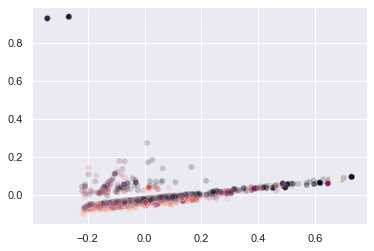

In [440]:
sns.scatterplot(x = sim_mat_pca[:,0],y = sim_mat_pca[:,1],c = NMF_pred,alpha=0.2)
plt.show()

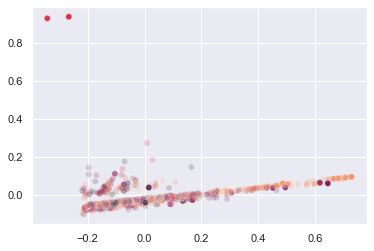

In [441]:
sns.scatterplot(x = sim_mat_pca[:,0],y = sim_mat_pca[:,1],c = LDA_pred,alpha=0.2)
plt.show()

In [442]:
from sklearn.manifold import TSNE

<AxesSubplot:>

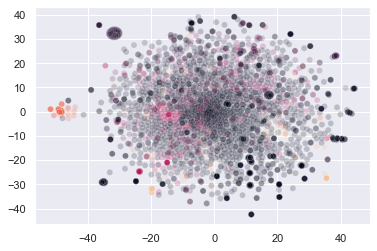

In [445]:
# sim_mat_tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_bow_test.toarray())
sim_mat_tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_tfidf_test.toarray())
sns.scatterplot(x = sim_mat_tsne[:,0],y = sim_mat_tsne[:,1],c = LSA_pred,alpha=0.2)

<AxesSubplot:>

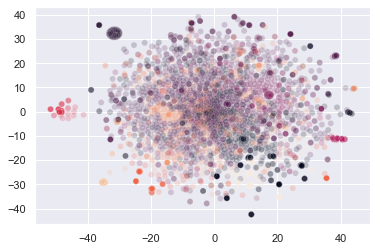

In [446]:
sns.scatterplot(x = sim_mat_tsne[:,0],y = sim_mat_tsne[:,1],c = NMF_pred,alpha=0.2)

<AxesSubplot:>

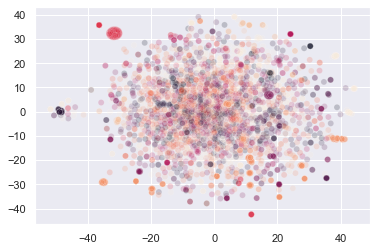

In [447]:
sns.scatterplot(x = sim_mat_tsne[:,0],y = sim_mat_tsne[:,1],c = LDA_pred,alpha=0.2)

stage2

According to the above result, we choose the following keywords and topics

Topic 1: project


Topic 2: nft


Topic 3: crypto


Topic 4: usdt


Topic 5: bitcoin

In [218]:
# Change as needed
K = 20
word_frequency_threshold = 2
epochs = 50
lr = 0.01

In [219]:
from gensim.models.doc2vec import Doc2Vec
import gensim

model = Doc2Vec(vector_size=K, min_count=word_frequency_threshold, epochs=epochs)

In [220]:

def corpus_transform(corpus,tokens_only=False):
    for i,line in enumerate(corpus):
        tokens = gensim.utils.simple_preprocess(line)
        
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])
train_corpus =  list(corpus_transform(train_text))
model.build_vocab(train_corpus)

In [221]:
%%time
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 11.1 s, sys: 1.79 s, total: 12.9 s
Wall time: 10.7 s


In [222]:
# # Template function
# def calculate_similarity(selected_topics):
#     sim_mat = []
#     for i in range(selected_topics.shape[1]):
#         tpc = selected_topics.iloc[:,i].tolist()
#         doc_vector = model.infer_vector(tpc)
#         sim = model.dv.most_similar([doc_vector],topn = len(train_corpus))
#         # only select the similiarities
#         sim = [x[1] for x in sim]
#         sim_mat.append(sim)

#     return np.array(sim_mat).T

# sim_mat = calculate_similarity(selected_topics)
# kmeans = KMeans(n_clusters=3, random_state=0).fit(sim_mat)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# sim_mat_pca = pca.fit_transform(sim_mat)
# sns.scatterplot(x = sim_mat_pca[:,0],y = sim_mat_pca[:,1],c = kmeans.labels_,alpha=0.2)

In [126]:
# from sklearn.manifold import TSNE
# sim_mat_tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(sim_mat)
# sns.scatterplot(x = sim_mat_tsne[:,0],y = sim_mat_tsne[:,1],c = kmeans.labels_,alpha=0.2)
# fig1 = plt.figure(figsize=(12, 12))
# ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)

# ax1.scatter(sim_mat[:,0],sim_mat[:,1],sim_mat[:,2], cmap="RdYlGn", edgecolor='k', s=200,c=kmeans.labels_)

## (10  pts) Task II: Evaluate your model by computing the most similar documents (tweets) to new (perhaps made up) tweets

In [223]:
# Template function
def find_similar_tweets(tweet, top_n=10):
    doc_vector = model.infer_vector(tweet)
    sims = model.dv.most_similar([doc_vector], topn=top_n)
    return sims

In [227]:
# Your code goes here
# tweet = ['Biden will win the selection']
topic1 = ["defi"]
# topic1 = ["project","airdrop",'good',"bsc","bitcoin","team",'airdropstario','great','future','blockchain']
sims_idx = find_similar_tweets(topic1,top_n=10)

print('The most similiarity:',sims_idx[1][1])
train_text[sims_idx[0][0]]

The most similiarity: 0.9090551137924194


'numbr bitcoin dollar numbr numbr numbr bitcoin cash dollar numbr numbr numbr ethereum dollar numbr link co numbr'

In [69]:
pd.concat([TrainDF,TestDF]).iloc[31299,]['text']

'@rocketdoge_info Good project, dedicated team\r\n\r\n@zomchim4 \r\n@JoelAmani12 \r\n@okejohnson8 \r\n@UmeghaluO \r\n\r\n#cryptocurrency #Bitcoin #Airdrop #BSC #ROCKETDODGE'

## (10 pts extra credit) Task III: Produce a scatter plot of the compressed document embeddings (2D or 3D)

*Useful resources*:

* http://projector.tensorflow.org/

In [84]:
def save_matrix(matrix, fpath):
    D1, D2 = matrix.shape
    tsv = ""
    for i in range(D1):
        for j in range(D2):
            tsv += str(matrix[i, j]) + '\t'
        tsv = tsv.strip('\t') + '\n'
    tsv = tsv.strip('\n')
    with open(fpath, "w") as fd:
        fd.write(tsv)
        
def save_vocab(vocab: dict, fpath):
    tsv = ""
    for word, idx in sorted(vocab.items(), key=lambda item: item[1]):
        tsv += word + '\n'
    tsv = tsv.strip('\n')
    with open(fpath, "w") as fd:
        fd.write(tsv)

In [85]:
U = model.syn1neg
save_matrix(U, "580final_train_embeddings.tsv")

vocab = model.wv.key_to_index
save_vocab(vocab, "580final_train_vocab.tsv")

In [86]:
U.shape

(11603, 20)

In [95]:
model.syn1neg.shape

(11603, 20)

In [93]:
train_corpus[1]

TaggedDocument(words=['trend', 'crypto', 'alert', 'algorand', 'algo', 'trade', 'usd', 'price', 'change', 'day', 'high', 'day', 'low', 'volume', 'market', 'cap', 'market', 'rank', 'cryptocurrency', 'crypto'], tags=[1])

In [89]:
len(vocab)

11603

In [228]:
from transformers import pipeline

In [229]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Downloading: 100%|██████████| 629/629 [00:00<00:00, 199kB/s]
Downloading: 100%|██████████| 255M/255M [00:12<00:00, 21.7MB/s]
Downloading: 100%|██████████| 48.0/48.0 [00:00<00:00, 44.0kB/s]
Downloading: 100%|██████████| 226k/226k [00:00<00:00, 3.99MB/s]


In [273]:
test_text = TrainDF['text'][1223]
test_text

"I am sure this project will bring great success later.let's join us and support this project until \n#SEVENPLUS… https://t.co/IRaexChY5B"

In [268]:
result = classifier(test_text)[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: NEGATIVE, with score: 0.9385


reference link

https://datapool.app/charts/cryptocurrency/btc_twitter_sentiment_analysis/ 

https://huggingface.co/models?sort=downloads&search=crypt 各种transformer的model

In [460]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

In [464]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "Omicron Is Spreading Faster Than Delta in South Africa, Scientists Say"

ner_results = nlp(example)
print(ner_results)
ner_results

[{'entity': 'B-ORG', 'score': 0.98273075, 'index': 1, 'word': 'O', 'start': 0, 'end': 1}, {'entity': 'I-ORG', 'score': 0.8753498, 'index': 2, 'word': '##mic', 'start': 1, 'end': 4}, {'entity': 'I-ORG', 'score': 0.95782435, 'index': 3, 'word': '##ron', 'start': 4, 'end': 7}, {'entity': 'B-LOC', 'score': 0.9873502, 'index': 12, 'word': 'Delta', 'start': 33, 'end': 38}, {'entity': 'B-LOC', 'score': 0.9994859, 'index': 14, 'word': 'South', 'start': 42, 'end': 47}, {'entity': 'I-LOC', 'score': 0.99865824, 'index': 15, 'word': 'Africa', 'start': 48, 'end': 54}, {'entity': 'B-ORG', 'score': 0.51795805, 'index': 17, 'word': 'Scientists', 'start': 56, 'end': 66}]


[{'entity': 'B-ORG',
  'score': 0.98273075,
  'index': 1,
  'word': 'O',
  'start': 0,
  'end': 1},
 {'entity': 'I-ORG',
  'score': 0.8753498,
  'index': 2,
  'word': '##mic',
  'start': 1,
  'end': 4},
 {'entity': 'I-ORG',
  'score': 0.95782435,
  'index': 3,
  'word': '##ron',
  'start': 4,
  'end': 7},
 {'entity': 'B-LOC',
  'score': 0.9873502,
  'index': 12,
  'word': 'Delta',
  'start': 33,
  'end': 38},
 {'entity': 'B-LOC',
  'score': 0.9994859,
  'index': 14,
  'word': 'South',
  'start': 42,
  'end': 47},
 {'entity': 'I-LOC',
  'score': 0.99865824,
  'index': 15,
  'word': 'Africa',
  'start': 48,
  'end': 54},
 {'entity': 'B-ORG',
  'score': 0.51795805,
  'index': 17,
  'word': 'Scientists',
  'start': 56,
  'end': 66}]

# conversation

In [ ]:
# from transformers import AutoModelForCausalLM, AutoTokenizer
# import torch

# tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-small")
# model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-small")

# # Let's chat for 5 lines
# for step in range(5):
#     # encode the new user input, add the eos_token and return a tensor in Pytorch
#     new_user_input_ids = tokenizer.encode(input(">> User:") + tokenizer.eos_token, return_tensors='pt')

#     # append the new user input tokens to the chat history
#     bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if step > 0 else new_user_input_ids

#     # generated a response while limiting the total chat history to 1000 tokens, 
#     chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

#     # pretty print last ouput tokens from bot
#     print("DialoGPT: {}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))

Downloading: 100%|██████████| 1.13k/1.13k [00:00<00:00, 595kB/s]
Downloading: 100%|██████████| 1.54k/1.54k [00:00<00:00, 1.17MB/s]
Downloading: 100%|██████████| 124k/124k [00:00<00:00, 1.56MB/s]
Downloading: 100%|██████████| 61.4k/61.4k [00:00<00:00, 1.29MB/s]
Downloading: 100%|██████████| 16.0/16.0 [00:00<00:00, 8.71kB/s]
Downloading: 100%|██████████| 772/772 [00:00<00:00, 555kB/s]
Downloading: 100%|██████████| 696M/696M [03:27<00:00, 3.52MB/s]


In [2]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
  
tokenizer = AutoTokenizer.from_pretrained("facebook/blenderbot-400M-distill")

model = AutoModelForSeq2SeqLM.from_pretrained("facebook/blenderbot-400M-distill")

In [4]:
 UTTERANCE = input("users:")
inputs = tokenizer([UTTERANCE], return_tensors='pt')
reply_ids = model.generate(**inputs)
print(tokenizer.batch_decode(reply_ids))

['<s> It is a form of digital currency that was created by a group of computer scientists in 2009.</s>']


# Zero-short classifcation

In [28]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

In [29]:
all_hashtag[:5]

0    c("crypto", "cryptocurrency", "crypto", "altse...
1    c("crypto", "cryptocurrency", "crypto", "altse...
2    c("crypto", "cryptocurrency", "crypto", "altse...
3    c("crypto", "cryptocurrency", "crypto", "altse...
4    c("crypto", "cryptocurrency", "crypto", "altse...
Name: hashtags, dtype: object

In [30]:
# sequence_to_classify = "one day I will see the world"
sequence_to_classify = TrainDF['text'][2]
sequence_to_classify = "Omicron Is Spreading Faster Than Delta in South Africa, Scientists Say"
sequence_to_classify
# candidate_labels = ['travel', 'cooking', 'dancing','life','varius']
candidate_labels  = all_hashtag[:5]
classifier(sequence_to_classify, candidate_labels)

'Omicron Is Spreading Faster Than Delta in South Africa, Scientists Say'

In [32]:
candidate_labels = ['travel', 'cooking', 'dancing', 'exploration']
classifier(sequence_to_classify, candidate_labels, multi_class=True)
#{'labels': ['travel', 'exploration', 'dancing', 'cooking'],
# 'scores': [0.9945111274719238,
#  0.9383890628814697,
#  0.0057061901316046715,
#  0.0018193122232332826],
# 'sequence': 'one day I will see the world'}

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'Omicron Is Spreading Faster Than Delta in South Africa, Scientists Say',
 'labels': ['travel', 'exploration', 'dancing', 'cooking'],
 'scores': [0.4231595993041992,
  0.3134388327598572,
  0.005405291449278593,
  0.0040554446168243885]}